In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = "NanumGothicCoding"
mpl.rcParams["axes.unicode_minus"] = False
import seaborn as sns
%matplotlib inline

전국 도시 공원 표준 데이터 => https://www.data.go.kr/dataset/15012890/standard.do

In [2]:
# 데이터 로드
# encoding 속성에 사용하는 "euc-kr"와 "cp949"는 같은 표현으로 보시면 됩니다.
park = pd.read_csv("./data/전국도시공원표준데이터.csv", encoding = "euc-kr", engine = "python")
park.shape

(18137, 20)

In [3]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [4]:
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [5]:
import missingno as msno

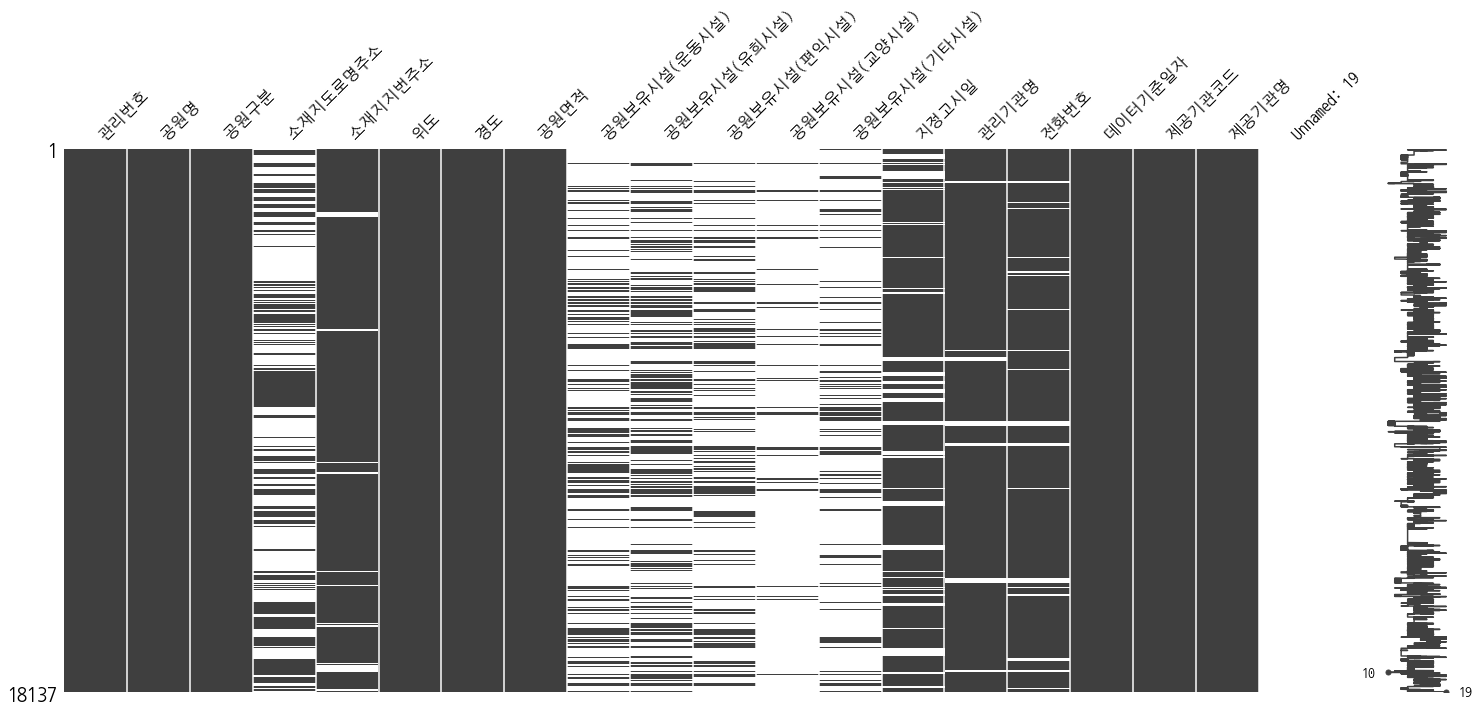

In [6]:
msno.matrix(park)

In [7]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [8]:
# drop() 메소드로 불필요한 컬럼을 제거한다.
# columns 속성에 제거할 열 이름을 적는다. 단, 제거할 열이 2개 이상이라면 리스트로 묶어준다.
# inplace = True 속성을 지정하면 실행 결과가 drop() 메소드를 실행하는 데이터프레임에 바로 적용된다.
park.drop(columns = ['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)',
    '공원보유시설(교양시설)', '공원보유시설(기타시설)', '지정고시일', '관리기관명', 
    'Unnamed: 19'], inplace = True)

전국 공원 분포 시각화

In [9]:
from plotnine import *

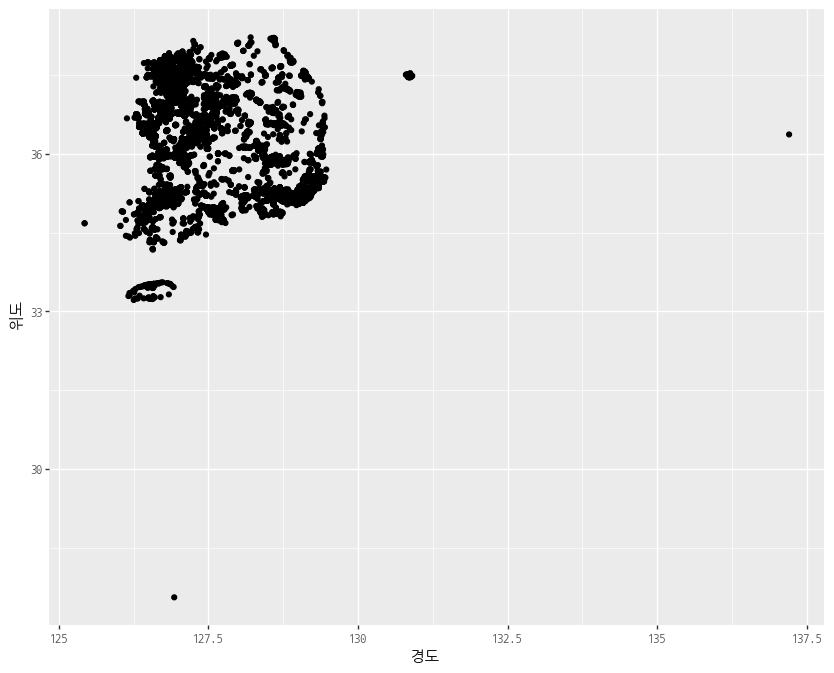

<ggplot: (-9223371912518047863)>

In [10]:
ggplot(park, aes(x = "경도", y = "위도")) \
    + geom_point() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 8))

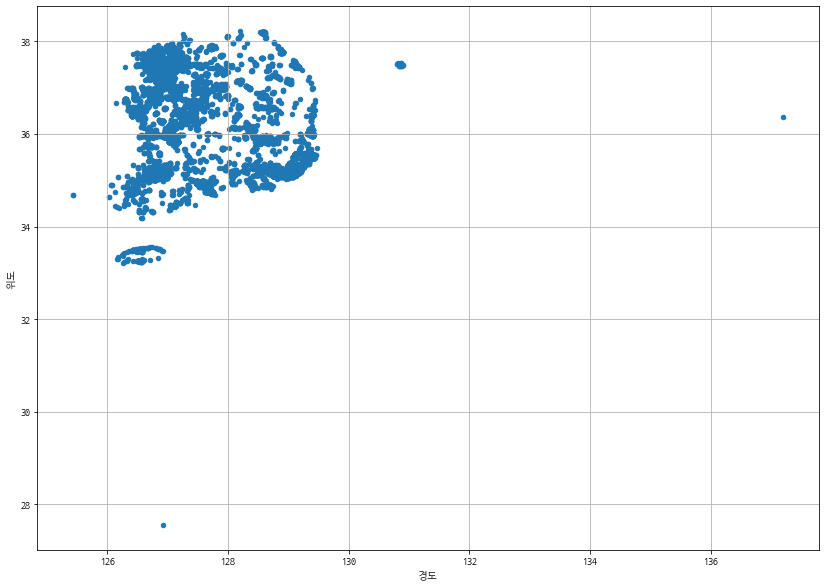

In [11]:
park.plot.scatter(x = "경도", y = "위도", figsize = (14, 10), grid = "True")

데이터 전처리

In [12]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

In [13]:
park["공원면적"].head()

0     9137.0
1    33756.0
2      646.0
3     1620.0
4     1009.0
Name: 공원면적, dtype: float64

In [14]:
# apply() 메소드는 브로드캐스팅을 실행한다.
# apply() 메소드의 인수인 lambda x로 park["공원면적"] 데이터가 넘어오고 넘어온 데이터를 ":" 뒤의
# 수식으로 일괄처리한다.
park["공원면적비율"] = park["공원면적"].apply(lambda x: np.sqrt(x) * 0.01)
park["공원면적비율"].head()

0    0.955877
1    1.837281
2    0.254165
3    0.402492
4    0.317648
Name: 공원면적비율, dtype: float64

In [15]:
# 도로명 주소가 null인 데이터의 개수 => 지번 주소만 입력된 데이터의 개수
# 도로명 주소만 입력되고 지번 주소가 입력되지 않은 데이터는 도로명 주소 제도가 시행되고 난 후
# 조성된 공원이다.
park["소재지도로명주소"].isnull().sum()

10098

In [16]:
park.loc[(park["소재지도로명주소"].isnull()) & (park["소재지지번주소"].notnull())]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.955877
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.837281
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.254165
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.402492
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.317648
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,28140-00009,송림4공원,어린이공원,NaN,인천광역시 동구 송림동 291-6,37.478715,126.653257,412.9,032-770-6205,2019-07-30,3500000,인천광역시 동구,0.203199
18133,47760-00002,서부공원,근린공원,NaN,경상북도 영양군 영양읍 서부리 123,36.660456,129.114953,56045.0,054-680-6340,2019-09-05,5170000,경상북도 영양군,2.367383
18134,47760-00003,입암공원,근린공원,NaN,경상북도 영양군 입암면 신구리 산27-5,36.594802,129.093007,109262.0,054-680-6340,2019-09-05,5170000,경상북도 영양군,3.305480
18135,47760-00004,수비공원,근린공원,NaN,경상북도 영양군 수비면 발리리 산48,36.761440,129.200011,67159.0,054-680-6340,2019-09-05,5170000,경상북도 영양군,2.591505


In [17]:
# 지번 주소가 null인 데이터의 개수 => 도로명 주소만 입력된 데이터의 개수
park["소재지지번주소"].isnull().sum()

979

In [18]:
park.loc[(park["소재지도로명주소"].notnull()) & (park["소재지지번주소"].isnull())]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율
2132,46130-00071,오복공원,근린공원,전라남도 여수시 경호동 239번지,NaN,34.709529,127.722047,16036.0,061-659-4627,2019-06-13,6460000,전라남도,1.266333
2133,46130-00072,대경도공원,근린공원,전라남도 여수시 경호동 193-2,NaN,34.707635,127.722798,26384.0,061-659-4627,2019-06-13,6460000,전라남도,1.624315
2135,46130-00076,성산공원,근린공원,전라남도 여수시 화장동 949,NaN,34.774538,127.645884,70845.0,061-659-4627,2019-06-13,6460000,전라남도,2.661672
2137,46130-00078,주공공원,어린이공원,전라남도 여수시 신기동 4,NaN,34.765323,127.676103,1500.0,061-659-4627,2019-06-13,6460000,전라남도,0.387298
2138,46130-00079,들몰공원,어린이공원,전라남도 여수시 신기동 5,NaN,34.765144,127.679023,1500.0,061-659-4627,2019-06-13,6460000,전라남도,0.387298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18115,44800-00078,남당취락2소공원,소공원,충청남도 홍성군 서부면 남당리 859 일원,NaN,36.539355,126.471621,2395.0,041-630-1268,2019-06-25,4600000,충청남도 홍성군,0.489387
18116,44800-00079,옥암1호소공원,소공원,충청남도 홍성군 홍성읍 옥암리 148-8 일원,NaN,36.593251,126.651456,1142.0,041-630-1268,2019-06-25,4600000,충청남도 홍성군,0.337935
18117,44800-00080,옥암2호어린이공원,어린이공원,충청남도 홍성군 홍성읍 오관리 190 일원,NaN,36.599064,126.663734,1612.0,041-630-1268,2019-06-25,4600000,충청남도 홍성군,0.401497
18118,44800-00081,옥암1호어린이공원,어린이공원,충청남도 홍성군 홍성읍 옥암리 381-3 일원,NaN,36.587390,126.646558,1586.0,041-630-1268,2019-06-25,4600000,충청남도 홍성군,0.398246


In [19]:
# 도로명 주소와 지번 주소가 모두 입력된 데이터의 개수
park.loc[(park["소재지도로명주소"].notnull()) & (park["소재지지번주소"].notnull())]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율
22,26440-00023,명지공원,근린공원,부산광역시 강서구 명지오션시티7로 30 (명지동),부산광역시 강서구 명지동 3247번지,35.087766,128.908524,170405.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,4.128014
23,26440-00024,철새탐방공원,문화공원,부산광역시 강서구 명지오션시티1로 284 (명지동),부산광역시 강서구 명지동 3308-3,35.084080,128.911810,1344.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.366606
32,26440-00033,보람공원,근린공원,부산광역시 강서구 녹산산단262로14번길 20 (송정동),부산광역시 강서구 송정동 1718,35.088095,128.843216,27739.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.665503
38,26440-00039,지사공원(2호근린공원),근린공원,부산광역시 강서구 과학산단2로20번길 7-7 (지사동),부산광역시 강서구 지사동 1180,35.151337,128.831400,11232.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.059811
44,26440-00045,화암공원,근린공원,부산광역시 강서구 화전산단5로 131 (화전동),부산광역시 강서구 화전동 554-3,35.110563,128.877536,21908.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.480135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18027,11590-00040,국화원,소공원,"서울특별시 동작구 상도로30길 39(상도동, 상도두산위브아파트)",서울특별시 동작구 상도동 529 상도두산위브아파트,37.504836,126.943714,757.0,NaN,2019-02-20,3190000,서울특별시 동작구,0.275136
18121,28140-00011,창영공원,어린이공원,인천광역시 동구 우각로 26,인천광역시 동구 창영동 21-15,37.470778,126.639105,1019.8,032-770-6205,2019-07-30,3500000,인천광역시 동구,0.319343
18125,28140-00002,화도진공원,근린공원,인천광역시 동구 화도진로 114,인천광역시 동구 화수동 140-1,37.481481,126.628353,20830.0,032-770-6202,2019-07-30,3500000,인천광역시 동구,1.443260
18126,28140-00003,"인천교공원(A,B블럭)",근린공원,인천광역시 동구 방축로 231,인천광역시 동구 송림동 318,37.477844,126.669618,94068.0,032-770-6203,2019-07-30,3500000,인천광역시 동구,3.067051


In [20]:
# 도로명 주소와 지번 주소가 모두 입력되지 않은 데이터의 개수
park.loc[(park["소재지도로명주소"].isnull()) & (park["소재지지번주소"].isnull())]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율


In [21]:
# 도로명 주소가 null인 데이터를 지번 주소로 채워준다.
park["소재지도로명주소"].fillna(park["소재지지번주소"], inplace = True)

In [22]:
park["소재지도로명주소"].isnull().sum()

0

In [23]:
park.loc[(park["소재지도로명주소"].isnull()) & (park["소재지지번주소"].notnull())]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율


In [24]:
# split() 메소드를 실행할 때 expand = True 옵션을 지정하면 데이터프레임으로 분리되고 인덱싱이 가능
# 해진다.
park["소재지도로명주소"].str.split(" ", expand = True).head()

,0,1,2,3,4,5,6,7,8
0,부산광역시,강서구,구랑동,1199-7,None,None,None,None,None
1,부산광역시,강서구,구랑동,1219,None,None,None,None,None
2,부산광역시,강서구,대저1동,1330-7,None,None,None,None,None
3,부산광역시,강서구,대저2동,1870-67,None,None,None,None,None
4,부산광역시,강서구,대저2동,2407-1,None,None,None,None,None


In [25]:
# 소재지도로명주소 주소에서 시도만 추출한다.
park["시도"] = park["소재지도로명주소"].str.split(" ", expand = True)[0]
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.955877,부산광역시
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.837281,부산광역시
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.254165,부산광역시
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.402492,부산광역시
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.317648,부산광역시


In [26]:
# 소재지도로명주소 주소에서 구군만 추출한다.
park["구군"] = park["소재지도로명주소"].str.split(" ", expand = True)[1]
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.955877,부산광역시,강서구
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.837281,부산광역시,강서구
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.254165,부산광역시,강서구
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.402492,부산광역시,강서구
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.317648,부산광역시,강서구


In [27]:
# 소재지도로명주소 주소에서 읍면만 추출한다.
park["읍면"] = park["소재지도로명주소"].str.split(" ", expand = True)[2]
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군,읍면
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.955877,부산광역시,강서구,구랑동
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.837281,부산광역시,강서구,구랑동
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.254165,부산광역시,강서구,대저1동
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.402492,부산광역시,강서구,대저2동
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.317648,부산광역시,강서구,대저2동


In [28]:
park[["위도", "경도"]].describe()

,위도,경도
count,18137.000000,18137.000000
mean,36.335922,127.543937
std,1.051835,0.892670
min,27.551606,125.430955
25%,35.275430,126.872301
50%,36.364729,127.130926
75%,37.404278,128.466193
max,38.224926,137.202661


In [29]:
park_loc_notnull = park.loc[(park["위도"] > 32) & (park["경도"] < 132) & park["시도"].notnull()]
park_loc_notnull.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군,읍면
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.955877,부산광역시,강서구,구랑동
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.837281,부산광역시,강서구,구랑동
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.254165,부산광역시,강서구,대저1동
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.402492,부산광역시,강서구,대저2동
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.317648,부산광역시,강서구,대저2동


In [30]:
park.loc[(park["위도"] <= 24) | (park["경도"] >= 132)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군,읍면
12926,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,043-201-4433,2019-06-21,5710000,충청북도 청주시,1.823678,충청북도,청주시,흥덕구


In [31]:
park_loc_notnull["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1744
충청남도       1723
전라북도       1137
경상북도        917
충청북도        898
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

시도별 공원 데이터 시각화

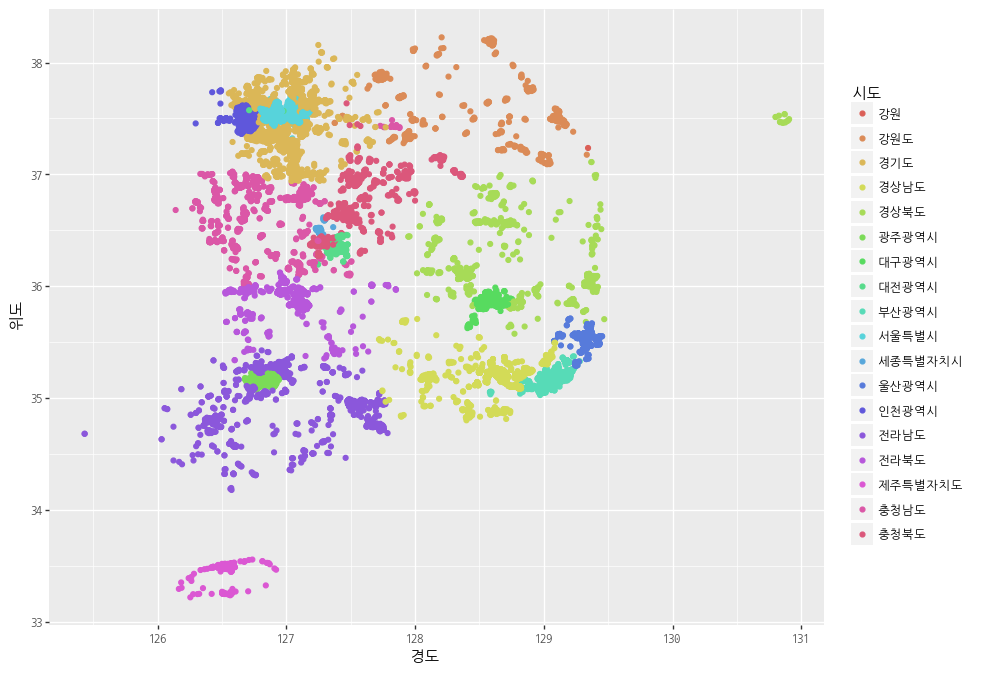

<ggplot: (124342141262)>

In [32]:
ggplot(park_loc_notnull, aes(x = "경도", y = "위도", color = "시도")) \
    + geom_point() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 8))

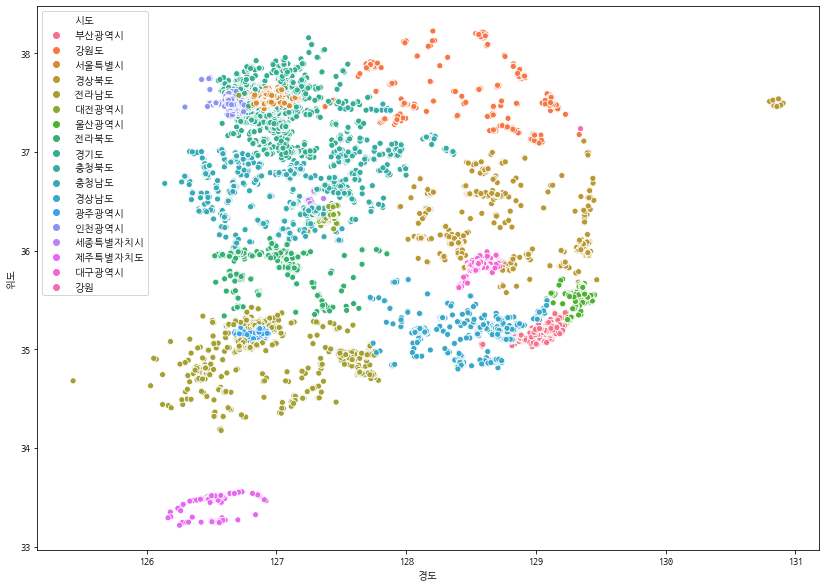

In [33]:
plt.figure(figsize = (14, 10))
sns.scatterplot(data = park_loc_notnull, x = "경도", y = "위도", hue = "시도")

공원 구분별 분포

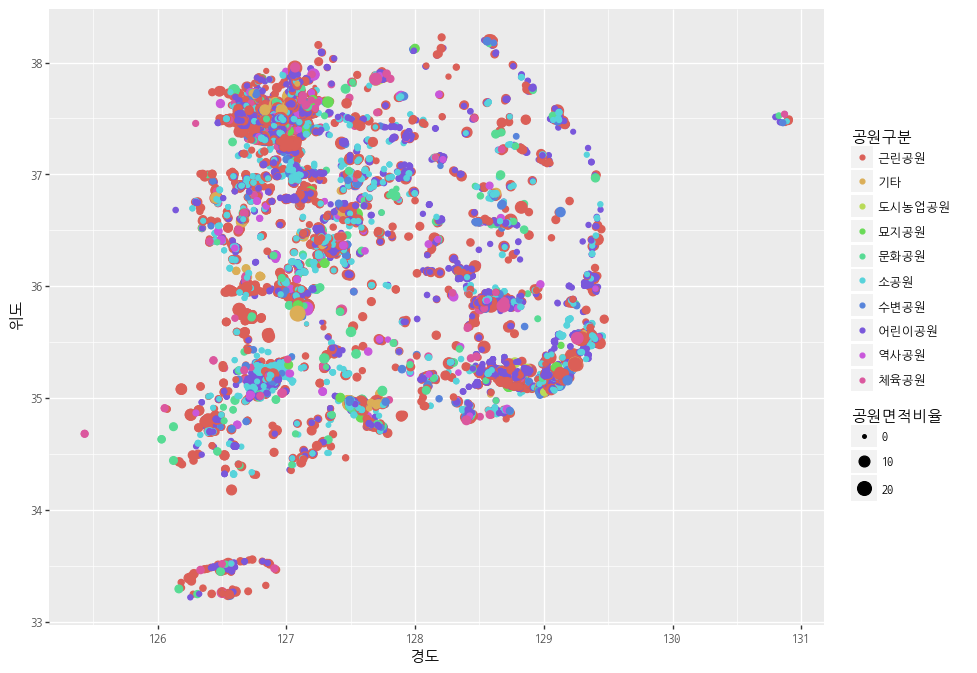

<ggplot: (124343690276)>

In [34]:
ggplot(park_loc_notnull, aes(x = "경도", y = "위도", color = "공원구분", size = "공원면적비율")) \
    + geom_point() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 8))

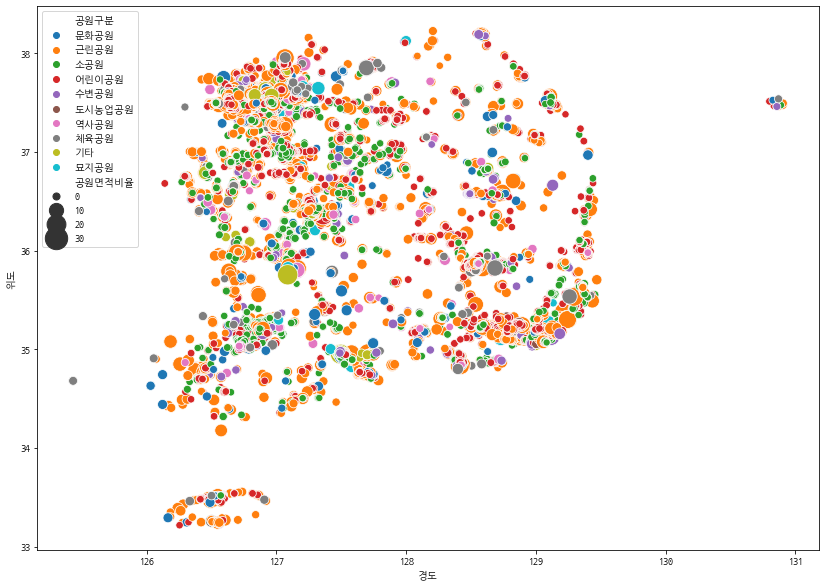

In [35]:
plt.figure(figsize = (14, 10))
sns.scatterplot(data = park_loc_notnull, x = "경도", y = "위도", hue = "공원구분",
               size = "공원면적비율", sizes = (50, 500))

어린이 공원을 제외한 공원 분포

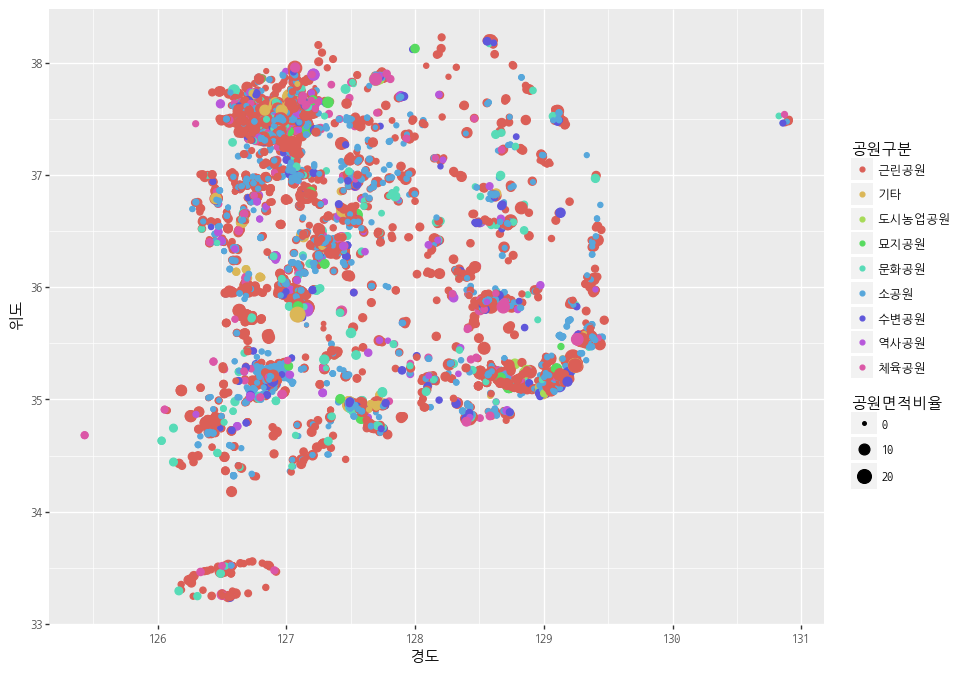

<ggplot: (124343714112)>

In [38]:
ggplot(park_loc_notnull.loc[park_loc_notnull["공원구분"] != "어린이공원"], \
       aes(x = "경도", y = "위도", color = "공원구분", size = "공원면적비율")) \
    + geom_point() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 8))

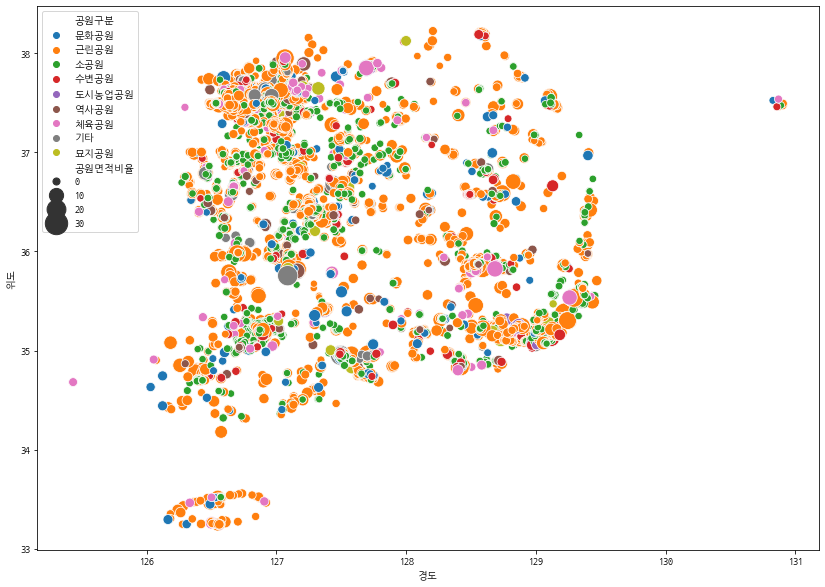

In [39]:
plt.figure(figsize = (14, 10))
sns.scatterplot(data = park_loc_notnull.loc[park_loc_notnull["공원구분"] != "어린이공원"], 
      x = "경도", y = "위도", hue = "공원구분", size = "공원면적비율", sizes = (50, 500))

시도별 공원 비율

In [45]:
# 시도에 "강원"이라고 입력된 데이터가 1건 있으므로 "강원도"로 변경한다.
park["시도"][park["시도"] == "강원"] = "강원도"

In [ ]:
# 판다스의 value_counts() 메소드의 옵션
# normalize => 기본값은 False이고 합계를 계산한다. True를 쓰면 합계에 대한 비율을 계산한다.
# ascending => 기본값은 False이고 내림차순으로 정렬한다. True를 쓰면 오름차순으로 정렬한다.
# dropna => 기본값은 True이고 NaN을 무시한다. False를 NaN를 포함시켜 계산한다.

In [55]:
# 시도별로 합계 데이터를 계산한다.
park_do = pd.DataFrame(park["시도"].value_counts())
park_do

,시도
경기도,3318
전라남도,1882
경상남도,1825
서울특별시,1745
충청남도,1723
전라북도,1137
경상북도,917
충청북도,899
울산광역시,887
인천광역시,675


In [56]:
# 시도별로 비율 데이터를 계산한다.
park_do_normalize = pd.DataFrame(park["시도"].value_counts(normalize = True))
park_do_normalize

,시도
경기도,0.182941
전라남도,0.103766
경상남도,0.100623
서울특별시,0.096212
충청남도,0.094999
전라북도,0.062690
경상북도,0.050560
충청북도,0.049567
울산광역시,0.048906
인천광역시,0.037217


In [57]:
# 시도별 합계 데이터와 비율 데이터를 병합한다.
park_sido = park_do.merge(park_do_normalize, left_index = True, right_index = True).reset_index()
park_sido

,index,시도_x,시도_y
0,경기도,3318,0.182941
1,전라남도,1882,0.103766
2,경상남도,1825,0.100623
3,서울특별시,1745,0.096212
4,충청남도,1723,0.094999
5,전라북도,1137,0.062690
6,경상북도,917,0.050560
7,충청북도,899,0.049567
8,울산광역시,887,0.048906
9,인천광역시,675,0.037217


In [59]:
# 병합된 데이터의 열 이름을 변경한다.
park_sido.columns = ["시도", "합계", "평균"]
# 합계를 기준을 내림차순 정렬한다.
park_sido.sort_values(by = ["합계"], ascending = False)
park_sido

,시도,합계,평균
0,경기도,3318,0.182941
1,전라남도,1882,0.103766
2,경상남도,1825,0.100623
3,서울특별시,1745,0.096212
4,충청남도,1723,0.094999
5,전라북도,1137,0.062690
6,경상북도,917,0.050560
7,충청북도,899,0.049567
8,울산광역시,887,0.048906
9,인천광역시,675,0.037217


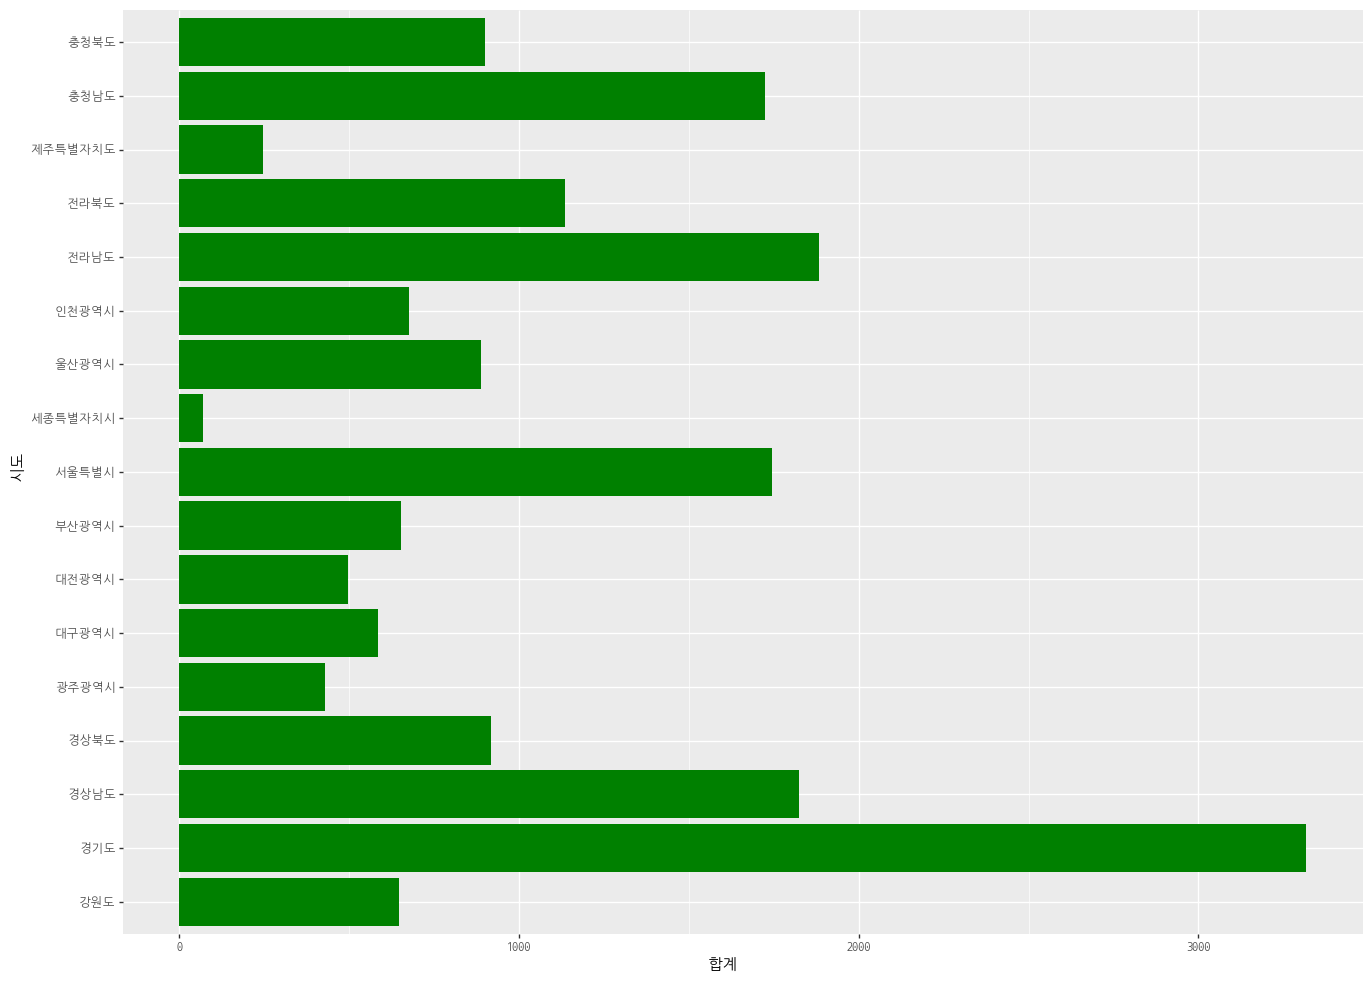

<ggplot: (124342324123)>

In [67]:
ggplot(park_sido, aes(x = "시도", y = "합계")) \
    + geom_bar(stat = "identity", fill = "green") \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (16, 12)) \
    + coord_flip()

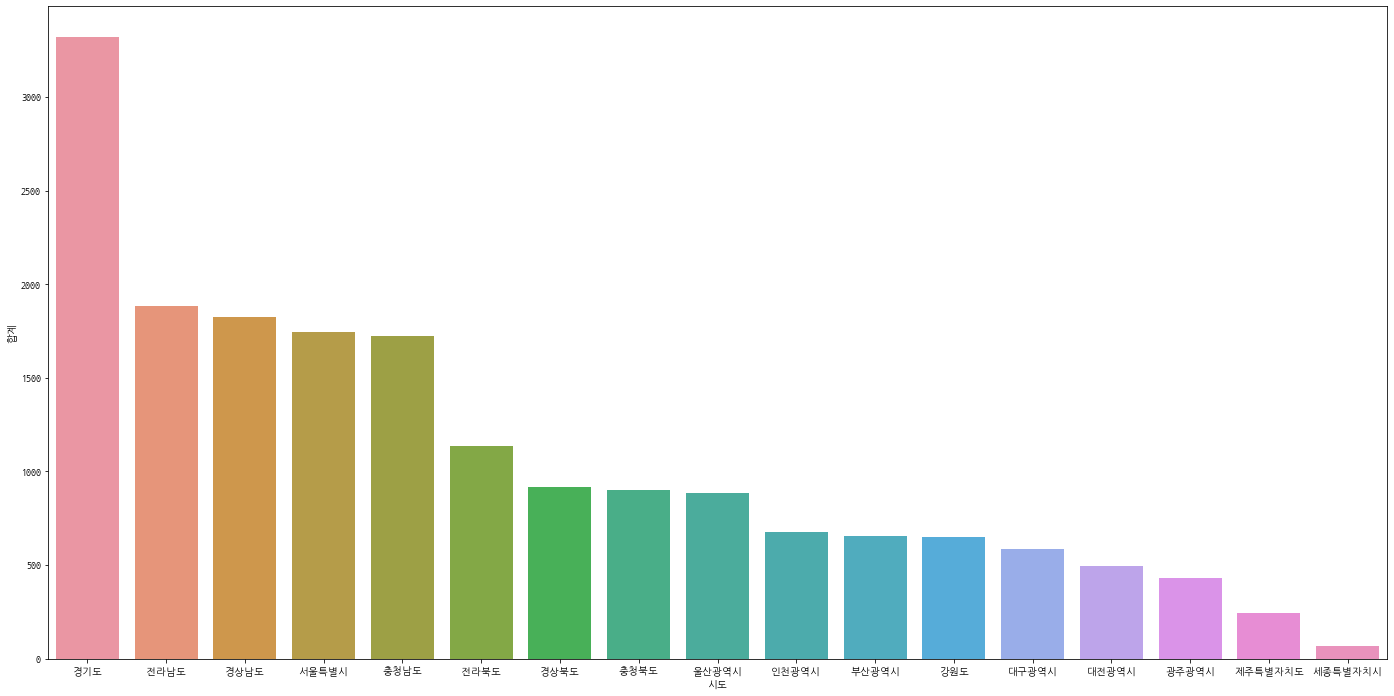

In [72]:
plt.figure(figsize = (24, 12))
sns.barplot(data = park_sido, x = "시도", y = "합계")

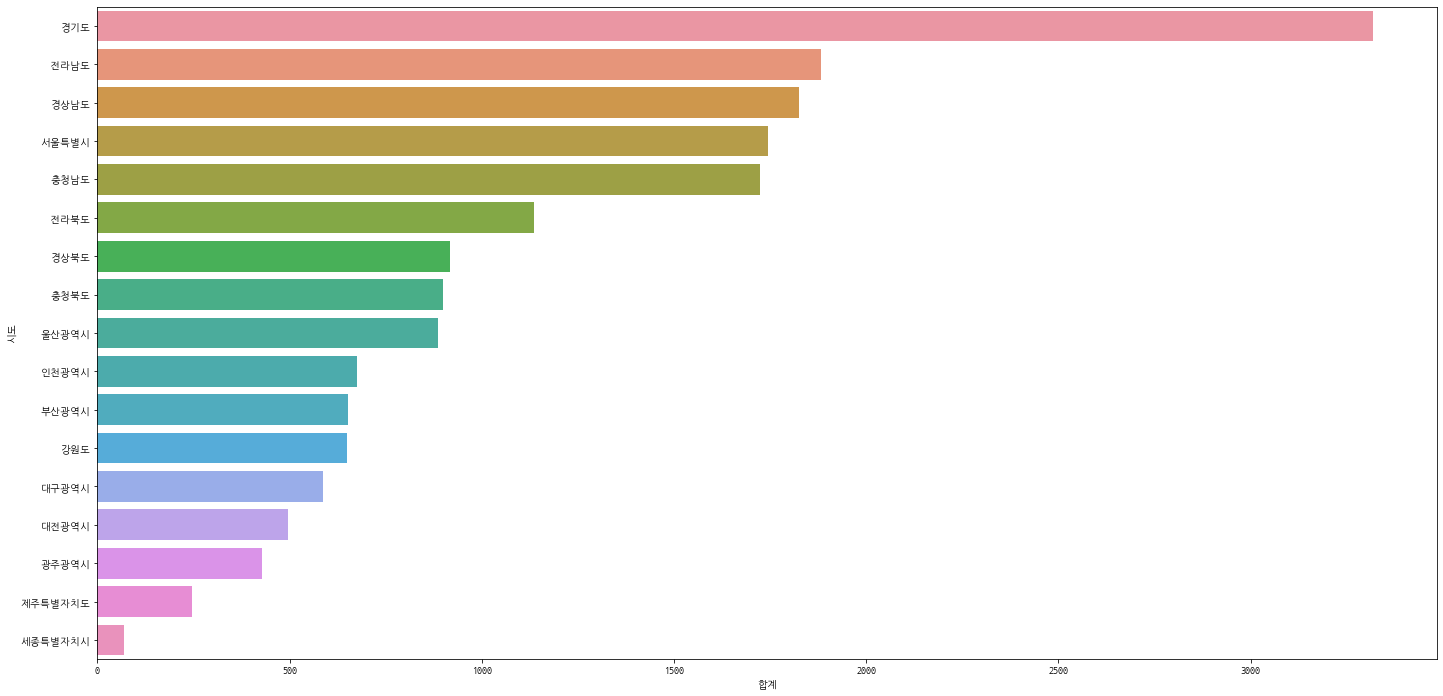

In [73]:
plt.figure(figsize = (24, 12))
sns.barplot(data = park_sido, x = "합계", y = "시도")

공원 구분별 합계

In [81]:
park_type = pd.DataFrame(park["공원구분"].value_counts().reset_index())
park_type.columns = ["공원구분", "합계"]
park_type

,공원구분,합계
0,어린이공원,9987
1,근린공원,4170
2,소공원,2647
3,문화공원,322
4,수변공원,301
5,기타,260
6,체육공원,230
7,역사공원,164
8,묘지공원,43
9,도시농업공원,13


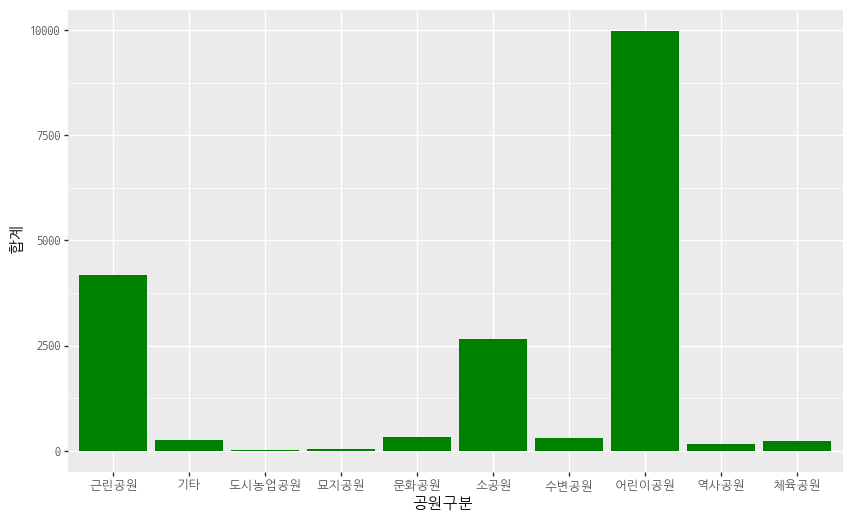

<ggplot: (124344592858)>

In [85]:
ggplot(park_type, aes(x = "공원구분", y = "합계")) \
    + geom_bar(stat = "identity", fill = "green") \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6))

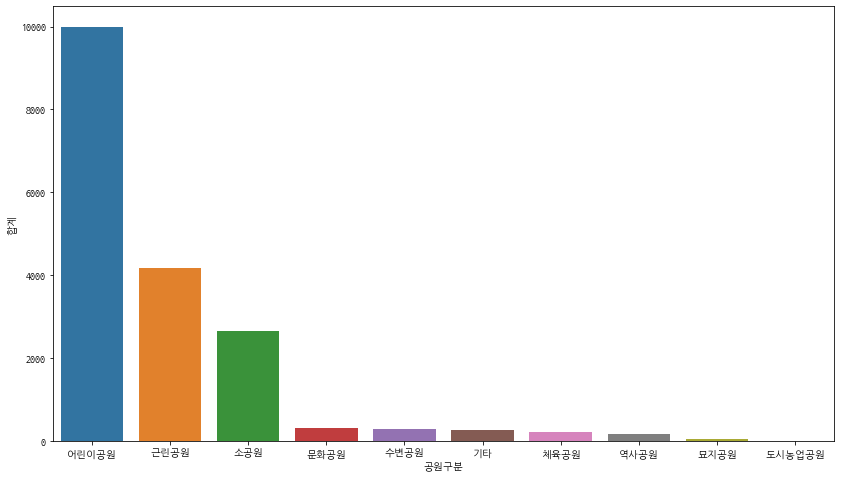

In [87]:
plt.figure(figsize = (14, 8))
sns.barplot(data = park_type, x = "공원구분", y = "합계")

경기도

In [88]:
gg = park.loc[park["시도"] == "경기도"]
gg

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군,읍면
1336,41500-00001,설봉공원,근린공원,경기도 이천시 경충대로 2709번길 128,경기도 이천시 관고동 356,37.279457,127.427553,1644940.0,031-645-3844,2019-03-05,4070000,경기도 이천시,12.825521,경기도,이천시,경충대로
1337,41500-00002,온천공원,근린공원,경기도 이천시 애련정로 110-2,경기도 이천시 창전동 산2-1,37.280266,127.450371,114600.0,031-645-3844,2019-03-05,4070000,경기도 이천시,3.385262,경기도,이천시,애련정로
1338,41500-00003,수변공원,수변공원,경기도 이천시 경충대로 2422번길 17,경기도 이천시 진리동 148,37.268120,127.460527,12040.0,031-645-3844,2019-03-05,4070000,경기도 이천시,1.097269,경기도,이천시,경충대로
1339,41500-00004,심포니공원,어린이공원,경기도 이천시 서희로 82번길 46,경기도 이천시 창전동 139,37.282298,127.445778,2947.0,031-645-3844,2019-03-05,4070000,경기도 이천시,0.542863,경기도,이천시,서희로
1340,41500-00005,이수흥공원,어린이공원,경기도 이천시 창전동 76,경기도 이천시 창전동 76,37.282546,127.442041,1902.0,031-645-3844,2019-03-05,4070000,경기도 이천시,0.436119,경기도,이천시,창전동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17982,41250-00021,지행1어린이공원,어린이공원,경기도 동두천시 지행로94번길 43-9,경기도 동두천시 지행동 334-36,37.891875,127.059730,1570.0,031-860-2416,2019-02-13,3920000,경기도 동두천시,0.396232,경기도,동두천시,지행로94번길
17983,41250-00024,지행2어린이공원,어린이공원,경기도 동두천시 행선로20번길 60,경기도 동두천시 지행동 379,37.889088,127.063089,2445.0,031-860-2416,2019-02-13,3920000,경기도 동두천시,0.494469,경기도,동두천시,행선로20번길
17984,41250-00006,지행3어린이공원,어린이공원,경기도 동두천시 평화로2238번길 22,경기도 동두천시 지행동 406-103,37.887459,127.058008,1500.0,031-860-2416,2019-02-13,3920000,경기도 동두천시,0.387298,경기도,동두천시,평화로2238번길
17985,41250-00010,창말공원,어린이공원,경기도 동두천시 안창말로 14,경기도 동두천시 동두천동 136-17,37.932267,127.057823,3391.0,031-860-2416,2019-02-13,3920000,경기도 동두천시,0.582323,경기도,동두천시,안창말로


In [91]:
gg_park = pd.DataFrame(gg["공원구분"].value_counts().reset_index())
gg_park

,index,공원구분
0,어린이공원,1821
1,근린공원,806
2,소공원,406
3,문화공원,91
4,체육공원,73
5,수변공원,61
6,역사공원,34
7,기타,17
8,묘지공원,8
9,도시농업공원,1


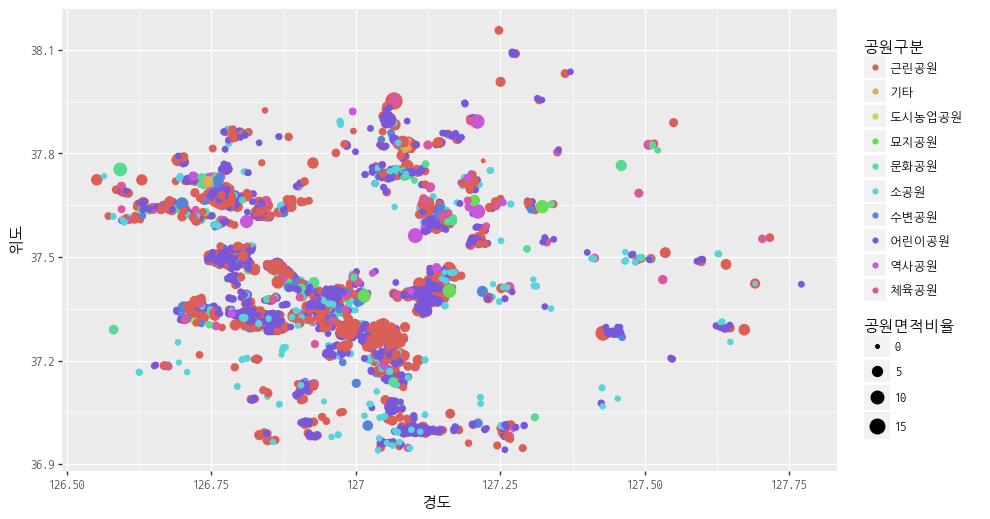

<ggplot: (-9223371912505914750)>

In [92]:
ggplot(gg, aes(x = "경도", y = "위도", color = "공원구분", size = "공원면적비율")) \
    + geom_point() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6))

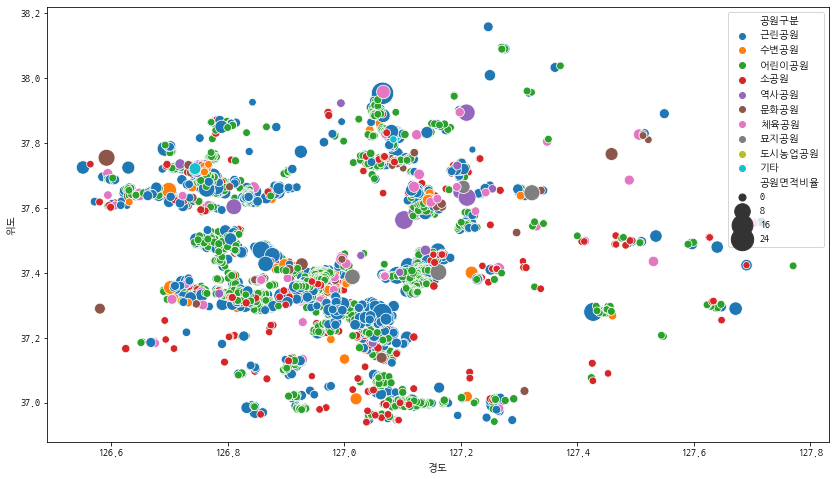

In [95]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = gg, x = "경도", y = "위도", hue = "공원구분", size = "공원면적비율",
               sizes = (50, 500))

수원시

In [97]:
gg_suwon = gg.loc[gg["구군"] == "수원시"]
gg_suwon

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군,읍면
16666,41117-00081,소담,어린이공원,경기도 수원시 영통구 태장로 84 (망포동),경기도 수원시 영통구 태장로 84 (망포동),37.238966,127.055529,900.0,031-228-4282,2019-09-07,3740000,경기도 수원시,0.300000,경기도,수원시,영통구
16667,41111-00080,제17호 소공원(송원),소공원,경기도 수원시 장안구 조원동 912-2,경기도 수원시 장안구 조원동 912-2,37.307711,127.011307,3002.0,031-228-4282,2019-09-07,3740000,경기도 수원시,0.547905,경기도,수원시,장안구
16668,41113-00081,제18호 소공원,소공원,경기도 수원시 권선구 삼천병마로1598번길 28-28 (오목천동),경기도 수원시 권선구 삼천병마로1598번길 28-28 (오목천동),37.245841,126.966211,174.0,031-228-4282,2019-09-07,3740000,경기도 수원시,0.131909,경기도,수원시,권선구
16669,41113-00082,제28호 소공원,소공원,경기도 수원시 권선구 권선동 1367-14,경기도 수원시 권선구 권선동 1367-14,37.247521,127.026383,1104.8,031-228-4282,2019-09-07,3740000,경기도 수원시,0.332385,경기도,수원시,권선구
16670,41113-00083,제29호 소공원,소공원,경기도 수원시 권선구 권선동 1367-26,경기도 수원시 권선구 권선동 1367-26,37.248903,127.020938,1030.3,031-228-4282,2019-09-07,3740000,경기도 수원시,0.320983,경기도,수원시,권선구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16922,41117-00009,벽적골,근린공원,경기도 수원시 영통구 영통2동 969-2,경기도 수원시 영통구 영통2동 969-2,37.248463,127.062524,13502.0,031-228-4282,2019-09-07,3740000,경기도 수원시,1.161981,경기도,수원시,영통구
16923,41117-00011,선주리들,근린공원,"경기도 수원시 영통구 동탄원천로915번길 33 (매탄동, 주공그린빌)","경기도 수원시 영통구 동탄원천로915번길 33 (매탄동, 주공그린빌)",37.256047,127.043994,19014.0,031-228-4282,2019-09-07,3740000,경기도 수원시,1.378913,경기도,수원시,영통구
16924,41117-00012,영통사,근린공원,경기도 수원시 영통구 봉영로 1658 (영통동),경기도 수원시 영통구 봉영로 1658 (영통동),37.257835,127.078038,9932.0,031-228-4282,2019-09-07,3740000,경기도 수원시,0.996594,경기도,수원시,영통구
16925,41117-00010,살구골,근린공원,"경기도 수원시 영통구 매영로 366 (영통동, 현대아파트)","경기도 수원시 영통구 매영로 366 (영통동, 현대아파트)",37.250664,127.071687,11753.0,031-228-4282,2019-09-07,3740000,경기도 수원시,1.084113,경기도,수원시,영통구


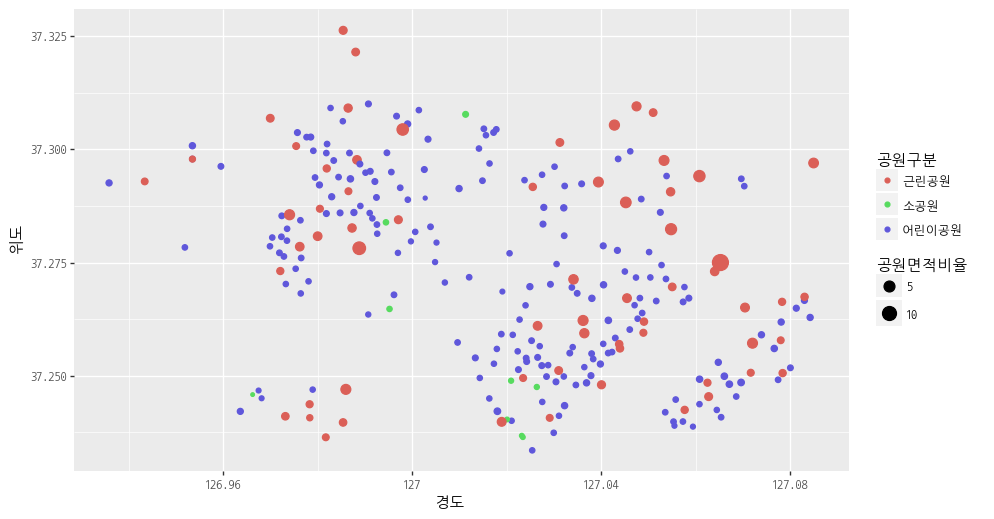

<ggplot: (-9223371912505309752)>

In [98]:
ggplot(gg_suwon, aes(x = "경도", y = "위도", color = "공원구분", size = "공원면적비율")) \
    + geom_point() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6))

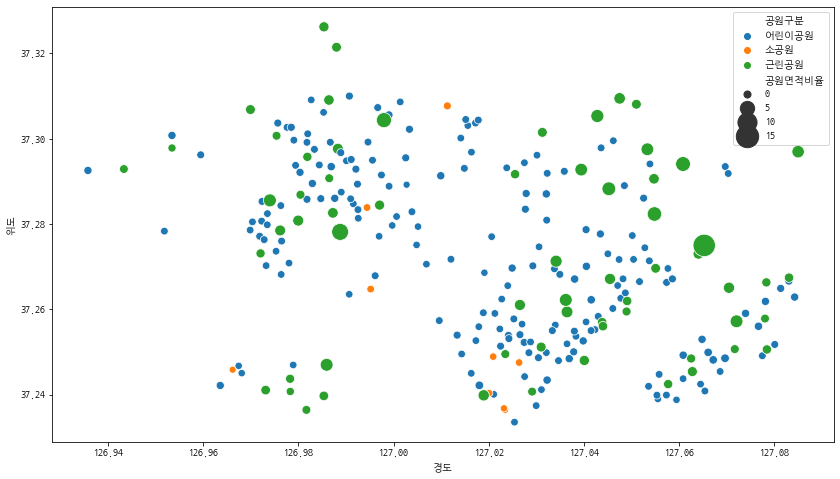

In [99]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = gg_suwon, x = "경도", y = "위도", hue = "공원구분", size = "공원면적비율",
               sizes = (50, 500))

In [100]:
import folium

In [106]:
suwon_map = folium.Map(location = [gg_suwon["위도"].mean(), gg_suwon["경도"].mean()],
                                   zoom_start = 12)

for n in gg_suwon.index:
    park_name = gg_suwon.loc[n, "공원명"] + " - " + gg_suwon.loc[n, "소재지도로명주소"]
    folium.Marker(
        location = [gg_suwon.loc[n, "위도"], gg_suwon.loc[n, "경도"]],
        popup = park_name
    ).add_to(suwon_map)
suwon_map.save("./data/suwon_map.html")
suwon_map

In [114]:
suwon_map = folium.Map(location = [gg_suwon["위도"].mean(), gg_suwon["경도"].mean()],
                                   zoom_start = 12)

for n in gg_suwon.index:
    park_name = gg_suwon.loc[n, "공원명"] + " - " + gg_suwon.loc[n, "소재지도로명주소"]
    
#   folium.Marker(
#       location = [gg_suwon.loc[n, "위도"], gg_suwon.loc[n, "경도"]],
#       popup = park_name
#   ).add_to(suwon_map)

    folium.CircleMarker(
        location = [gg_suwon.loc[n, "위도"], gg_suwon.loc[n, "경도"]],
        popup = park_name,
        radius = gg_suwon.loc[n, "공원면적비율"] * 3,
        color = "red",
        fill_color = "yellow",
        fill = True
    ).add_to(suwon_map)

suwon_map.save("./data/suwon_map.html")
suwon_map